In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
from scipy.optimize import curve_fit

In [61]:
d = pd.read_csv("T_const", delimiter=";", comment = "#")
d['V'] = 100 - d['V']
d

,V,P
0,50,104.0
1,49,105.7
2,48,107.6
3,47,109.7
4,46,112.0
...,...,...
73,26,193.9
74,25,200.1
75,24,208.0
76,23,216.3


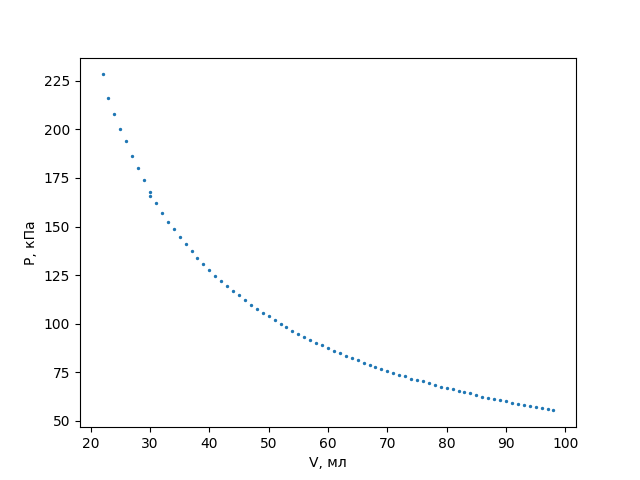

In [178]:
%matplotlib widget
plt.scatter(d['V'], d['P'], s=2)
plt.xlabel('V, мл')
plt.ylabel('P, кПа')
plt.savefig("PV.png")

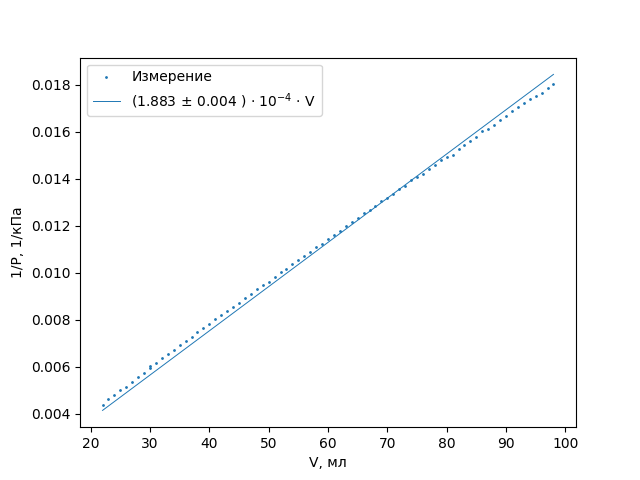

In [140]:
%matplotlib widget
plt.scatter(d['V'], 1/d['P'], s=1, label="Измерение")
plt.xlabel('V, мл')
plt.ylabel('1/P, 1/кПа')

f = lambda T, A: A*T
res1, err1 = curve_fit(f, d['V'], 1/d['P'])

V = np.array(d['V'])
V.sort()
plt.plot(V, f(V, *res1), '-', label=f"({round(res1[0]*1e4, 3)} ± {round(np.sqrt(np.diag(err1))[0]*1e4, 3)} ) · $10^{{-4}}$ · V", linewidth=0.7)
plt.legend()
plt.savefig("linePV.png")


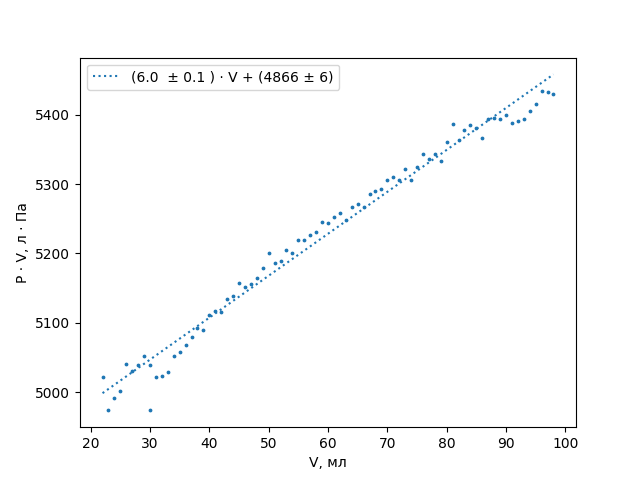

In [148]:
%matplotlib widget
plt.scatter(d['V'], d['V'] * d['P'], s=3)
plt.xlabel('V, мл')
plt.ylabel('P · V, л · Па')

f = lambda T, A, B: A*T + B
res1, err1 = curve_fit(f, d['V'], d['V'] * d['P'])
V = np.array(d['V'])
V.sort()
plt.plot(V, f(V, *res1), ':', label=f"({round(res1[0], 1)}  ± {round(np.sqrt(np.diag(err1))[0], 2)} ) · V + ({round(res1[1])} ± {round(np.sqrt(np.diag(err1))[1])})")
plt.legend()
plt.savefig("linePVfromV.png")

# Гей-Люссак

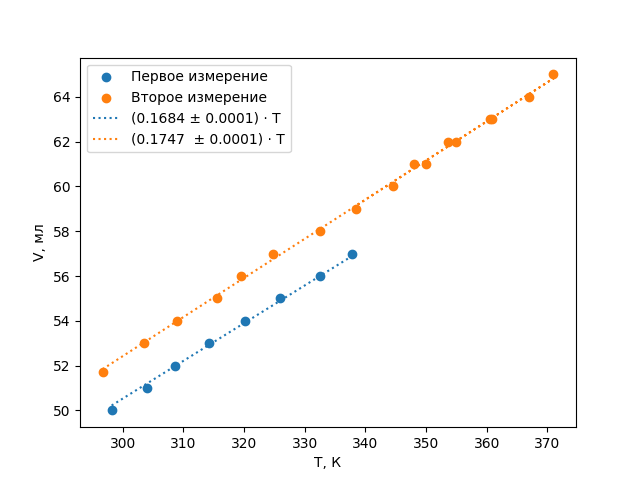

In [154]:
d2 = pd.read_csv("T↑", delimiter=";", comment = "#")
d2['V'] = 100 - d2['V']
d2['T'] += 273

d3 = pd.read_csv("T2↑", delimiter=";", comment = "#")
d3['V'] = 100 - d3['V']
d3['T'] += 273

%matplotlib widget
plt.scatter(d2['T'], d2['V'], label="Первое измерение")
plt.scatter(d3['T'], d3['V'], label="Второе измерение")
plt.xlabel('T, К')
plt.ylabel('V, мл')


f = lambda T, A: A*T
res2, err2 = curve_fit(f, d2['T'], d2['V'])
plt.plot(d2['T'], f(d2['T'], *res2), ':', label=f"({round(res2[0], 4)} ± {round(np.sqrt(np.diag(err2))[0], 4)}) · T")

f = lambda T, A: A*T
res3, err3 = curve_fit(f, d3['T'], d3['V'])
plt.plot(d3['T'], f(d3['T'], *res3), ':', label=f"({round(res3[0], 4)}  ± {round(np.sqrt(np.diag(err3))[0], 4)}) · T")

plt.legend()
plt.savefig("lineGL.png")

# Шарль

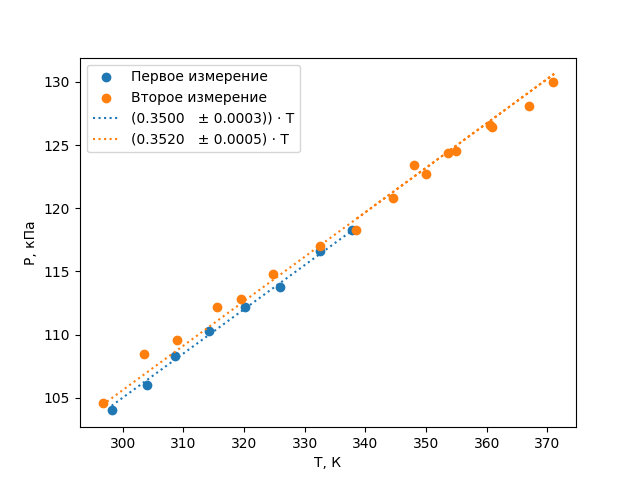

In [175]:
%matplotlib widget
plt.scatter(d2['T'], d2['P'], label="Первое измерение")
plt.scatter(d3['T'], d3['P'], label="Второе измерение")
plt.xlabel('T, К')
plt.ylabel('P, кПа')

f = lambda T, A: A*T
res2, err2 = curve_fit(f, d2['T'], d2['P'])
plt.plot(d2['T'], f(d2['T'], *res2), ':', label=f"({'{:.4f}'.format(round(res2[0], 4))}   ± {round(np.sqrt(np.diag(err2))[0], 4)})) · T")

f = lambda T, A: A*T
res3, err3 = curve_fit(f, d3['T'], d3['P'])
plt.plot(d3['T'], f(d3['T'], *res3), ':', label=f"({'{:.4f}'.format(round(res3[0], 4))}   ± {round(np.sqrt(np.diag(err3))[0], 4)}) · T")
plt.legend()
plt.savefig("Sh.png")